# Fit the DDM on individual data

In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data = data[data.participant == 20].reset_index(drop=True)

data['block_label'] += 1

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,20,1.0,1.0,46.0,46.0,4,2,1.0,2.574407,1.0
1,20,1.0,2.0,60.0,33.0,4,2,2.0,1.952774,1.0
2,20,1.0,3.0,32.0,44.0,2,1,2.0,2.074999,0.0
3,20,1.0,4.0,56.0,40.0,4,2,3.5,2.320916,0.0
4,20,1.0,5.0,34.0,32.0,2,1,3.5,1.471107,1.0


## Initialize the model

In [3]:
model = rlssm.DDModel(hierarchical_levels = 1)

Using cached StanModel


In [4]:
model.family, model.model_label, model.hierarchical_levels

('DDM', 'DDM', 1)

In [5]:
model.starting_point_bias

False

## Fit

In [6]:
# sampling parameters
n_iter = 1000
n_chains = 2
n_thin = 1

In [7]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    pointwise_waic=False,
    verbose = False)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 1000 iterations ended with a divergence (0.0%)
0 of 1000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


### get Rhat

In [8]:
model_fit.rhat.describe()

,rhat
count,3.000000
mean,1.000108
std,0.001876
min,0.998233
25%,0.999170
50%,1.000107
75%,1.001046
max,1.001985


In [9]:
model_fit.rhat.head()

,rhat,variable
0,1.000107,drift
1,0.998233,threshold
2,1.001985,ndt


### get wAIC

In [10]:
model_fit.waic

{'lppd': -224.51089269946007,
 'p_waic': 4.568369989137585,
 'waic': 458.1585253771953,
 'waic_se': 35.614308641058926}

## Posteriors

In [27]:
model_fit.samples.describe()

,chain,draw,transf_drift,transf_threshold,transf_ndt
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.50000,249.500000,0.950234,2.046214,0.917508
std,0.50025,144.409501,0.083177,0.076415,0.012294
min,0.00000,0.000000,0.679088,1.845066,0.865905
25%,0.00000,124.750000,0.893585,1.995491,0.910507
50%,0.50000,249.500000,0.948448,2.042306,0.919264
75%,1.00000,374.250000,1.006465,2.097855,0.926007
max,1.00000,499.000000,1.237784,2.330128,0.944063


In [12]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

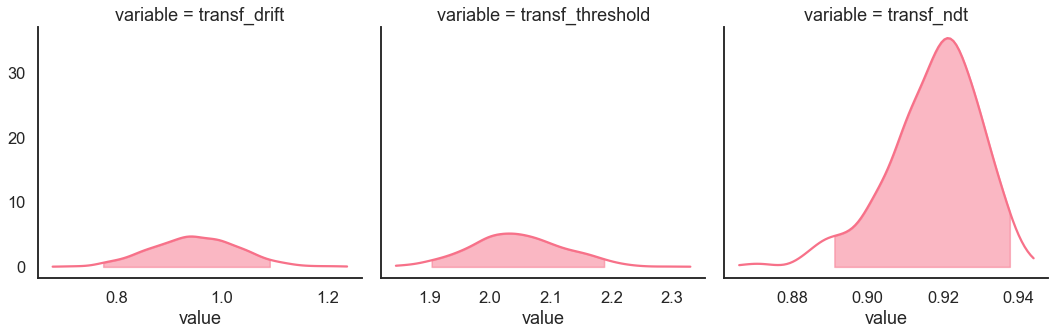

In [13]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [14]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.594541  1.162541  1.289541  1.754541  1.753541  1.811541   
2         1.825413  3.402413  3.323413  1.640413  3.008413  1.461413   
3         1.106817  1.765817  1.790817  1.213817  2.590817  1.804817   
4         1.458243  1.512243  1.121243  1.409243  2.005243  1.174243   
5         1.370265  3.151265  1.708265  1.207265  1.269265  1.261265   
...            ...       ...       ...       ...       ...       ...   
96        1.159170  1.324170  1.612170  1.214170  2.033170  1.620170   
97        1.213858  1.226858  1.714858  1.259858  1.348858  1.542858   
98        2.541807  1.892807  2.210807  1.674807  1.327807  3.093807   
99        1.695184  1.407184  1.459184  1.198184  1.206184  1.881184   
100       1.549069  1.251069  1.501069  1.553069  1.048069  1.532069   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.320541  1.341541  1.402541  1.497541  ...      1.0  1.0  1.0  1.0   
2         1.797413  1.333413  1.849413  1.565413  ...      1.0  1.0  0.0  1.0   
3         1.824817  2.411817  1.685817  1.159817  ...      0.0  1.0  1.0  0.0   
4         2.046243  1.456243  1.286243  2.749243  ...      0.0  0.0  1.0  1.0   
5         1.256265  1.958265  1.652265  3.398265  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.644170  3.080170  1.342170  4.476170  ...      1.0  0.0  0.0  1.0   
97        1.845858  1.163858  1.249858  1.375858  ...      1.0  1.0  0.0  1.0   
98        1.470807  1.102807  1.270807  1.553807  ...      1.0  1.0  1.0  1.0   
99        1.444184  1.324184  1.227184  1.221184  ...      0.0  1.0  1.0  1.0   
100       1.330069  1.971069  1.077069  2.460069  ...      1.0  1.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  0.0  0.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  0.0  1.0  1.0  
4         1.0  1.0  0.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  0.0  1.0  0.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  0.0  1.0  1.0  1.0  1.0  
99        1.0  1.0  1.0  1.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  1.0  1.0  

[100 rows x 480 columns]

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.858333,1.665562,1.672090,1.142541,1.287541,1.557541,1.860141,2.305141,1.150041,1.286041,1.502541,1.823041,2.422041
2,0.879167,1.708663,1.724117,1.181213,1.399013,1.478413,1.736613,1.970013,1.156413,1.363413,1.571413,1.823413,2.541413
3,0.908333,1.708879,1.070508,1.215217,1.359217,1.493817,1.755317,2.083217,1.188517,1.389117,1.598817,1.858217,2.476017
4,0.887500,1.822226,1.843154,1.293643,1.460443,1.634243,2.156243,2.787443,1.157443,1.323443,1.595243,1.906043,2.895443
5,0.879167,1.720669,4.087544,1.175465,1.241665,1.518265,1.799065,2.314865,1.160265,1.331265,1.510265,1.837265,2.470265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.870833,1.816528,2.002940,1.182170,1.343170,1.593170,2.077170,2.343170,1.178770,1.350970,1.582170,1.911770,2.682570
97,0.850000,1.820087,1.513412,1.165858,1.251858,1.496858,1.829358,2.250858,1.182658,1.405758,1.647858,2.006858,2.808658
98,0.879167,1.764307,1.687487,1.178407,1.325607,1.409807,1.946007,2.770007,1.159807,1.345807,1.598807,1.910807,2.626807


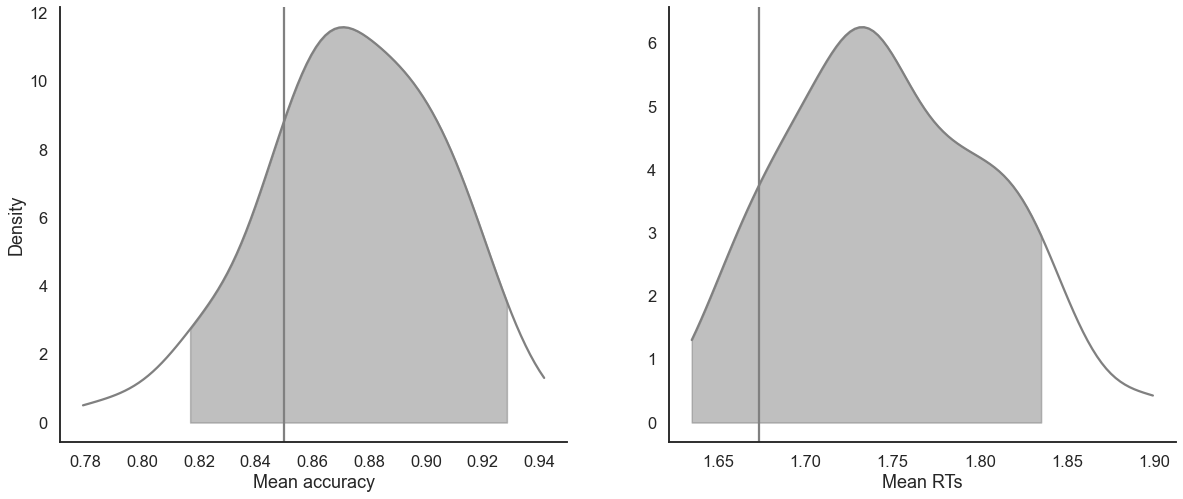

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

/Users/laurafontanesi/git/rlssm/rlssm/random.py:210: RuntimeWarning: invalid value encountered in multiply
  acc = np.empty(shape)*np.nan
/Users/laurafontanesi/git/rlssm/rlssm/random.py:211: RuntimeWarning: invalid value encountered in multiply
  rt = np.empty(shape)*np.nan


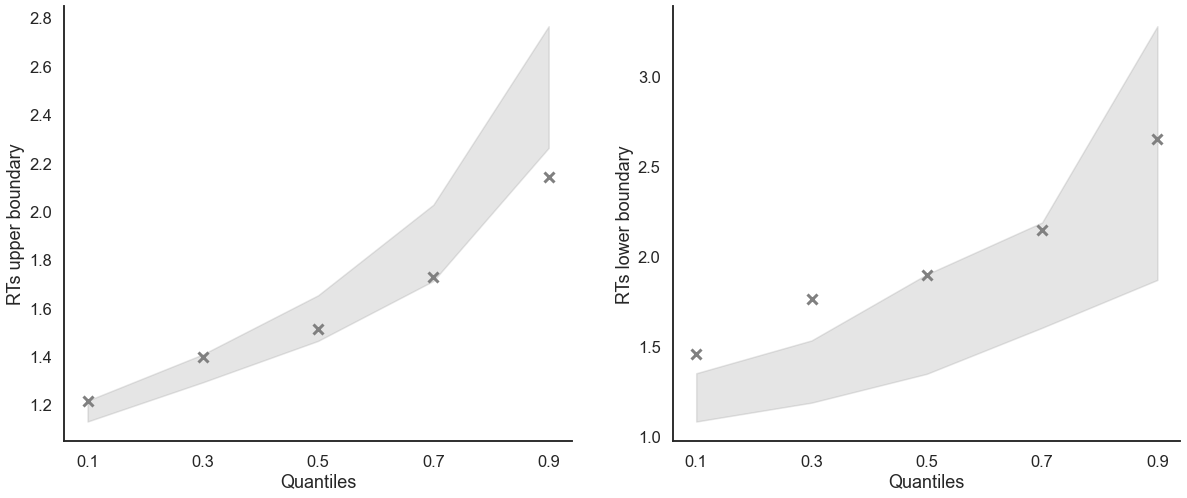

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [18]:
import numpy as np

In [19]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [20]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_neg,accuracy_flipped,choice_pair,block_bins
0,0,20,1.0,1.0,46.0,46.0,4,2,1.0,2.574407,1.0,1,-0.0,BD,1
1,1,20,1.0,2.0,60.0,33.0,4,2,2.0,1.952774,1.0,1,-0.0,BD,1
2,2,20,1.0,3.0,32.0,44.0,2,1,2.0,2.074999,0.0,-1,1.0,AB,1
3,3,20,1.0,4.0,56.0,40.0,4,2,3.5,2.320916,0.0,-1,1.0,BD,1
4,4,20,1.0,5.0,34.0,32.0,2,1,3.5,1.471107,1.0,1,-0.0,AB,1


In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

/Users/laurafontanesi/git/rlssm/rlssm/random.py:210: RuntimeWarning: invalid value encountered in multiply
  acc = np.empty(shape)*np.nan
/Users/laurafontanesi/git/rlssm/rlssm/random.py:211: RuntimeWarning: invalid value encountered in multiply
  rt = np.empty(shape)*np.nan


mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1                0.95  1.682741  0.051371   
                        2                0.85  1.651663  1.031071   
                        3                0.95  1.743317  0.876341   
                        4                0.80  1.739193  0.230977   
                        5                1.00  1.615365  0.888593   
...                                       ...       ...       ...   
3.0         CD          96               0.85  1.712370  1.411909   
                        97               0.90  1.832358  0.912827   
                        98               0.90  1.718357  1.986354   
                        99               0.80  1.774484  2.695123   
                        100              0.95  1.708869  1.609479   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1.0         AB          1              2.288541        1.383341   
                        2              1.360213        1.282213   
                        3              2.408817        1.345217   
                        4              1.585243        1.368743   
                        5                   NaN        1.455965   
...                                         ...             ...   
3.0         CD          96             1.435370        1.345570   
                        97             2.639658        1.426858   
                        98             1.268607        1.290807   
                        99             1.221784        1.390184   
                        100            2.969069        1.487869   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1.0         AB          1              2.288541        1.655541   
                        2              1.377413        1.451413   
                        3              2.408817        1.565817   
                        4              1.790243        1.717743   
                        5                   NaN        1.574265   
...                                         ...             ...   
3.0         CD          96             1.630170        1.624170   
                        97             2.692858        1.541858   
                        98             1.283807        1.489807   
                        99             1.297684        1.596184   
                        100            2.969069        1.646069   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1.0         AB          1              2.288541        1.945741  
                        2              1.772613        1.770413  
                        3              2.408817        1.929817  
                        4              1.970243        2.056243  
                        5                   NaN        1.707365  
...                                         ...             ...  
3.0         CD          96             1.685370        1.854170  
                        97             2.746058        1.791758  
                        98             1.299007        1.933407  
                        99             1.381784        2.005184  
                        100            2.969069        1.733869  

[1200 rows x 9 columns]

In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.933333  1.593908  1.105874         1.466141   
           2            0.866667  1.823280  2.922837         1.275313   
           3            0.933333  1.807884  1.061185         1.547017   
           4            0.800000  1.727343  1.471560         1.301743   
           5            0.833333  1.780965  3.304995         1.486265   
...                          ...       ...       ...              ...   
8          96           0.833333  1.719803  1.397395         1.221770   
           97           0.833333  1.890058  0.818019         1.898058   
           98           0.900000  1.584473  1.739119         1.412207   
           99           0.866667  1.708684  1.981371         1.373784   
           100          1.000000  1.909169  0.697978              NaN   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.301141         1.538541        1.477541   
           2             1.258913         2.053913        1.594413   
           3             1.390417         1.617817        1.730317   
           4             1.269743         1.336743        1.656743   
           5             1.439065         1.550265        1.692265   
...                           ...              ...             ...   
8          96            1.328170         1.224170        1.531170   
           97            1.500658         2.366858        1.749858   
           98            1.349807         1.543807        1.537807   
           99            1.313184         1.460684        1.496684   
           100           1.517769              NaN        1.905569   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.610941        1.730141  
           2              2.851213        1.677413  
           3              1.688617        2.041917  
           4              1.397243        1.989043  
           5              1.677465        1.861865  
...                            ...             ...  
8          96             1.343370        1.902970  
           97             2.370058        2.090058  
           98             1.702607        1.687807  
           99             1.604984        1.717684  
           100                 NaN        2.168869  

[800 rows x 9 columns]

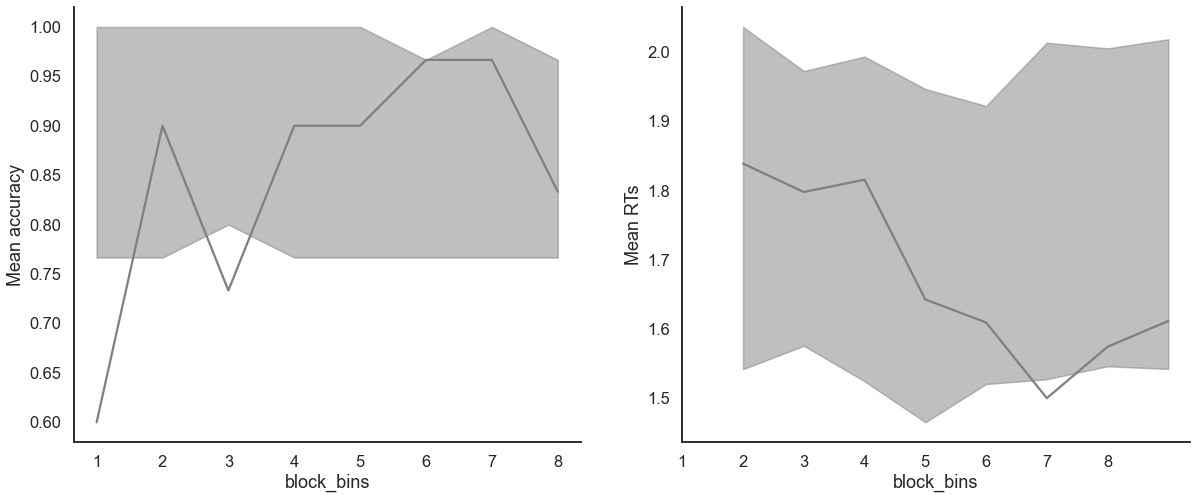

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

/Users/laurafontanesi/git/rlssm/rlssm/random.py:210: RuntimeWarning: invalid value encountered in multiply
  acc = np.empty(shape)*np.nan
/Users/laurafontanesi/git/rlssm/rlssm/random.py:211: RuntimeWarning: invalid value encountered in multiply
  rt = np.empty(shape)*np.nan


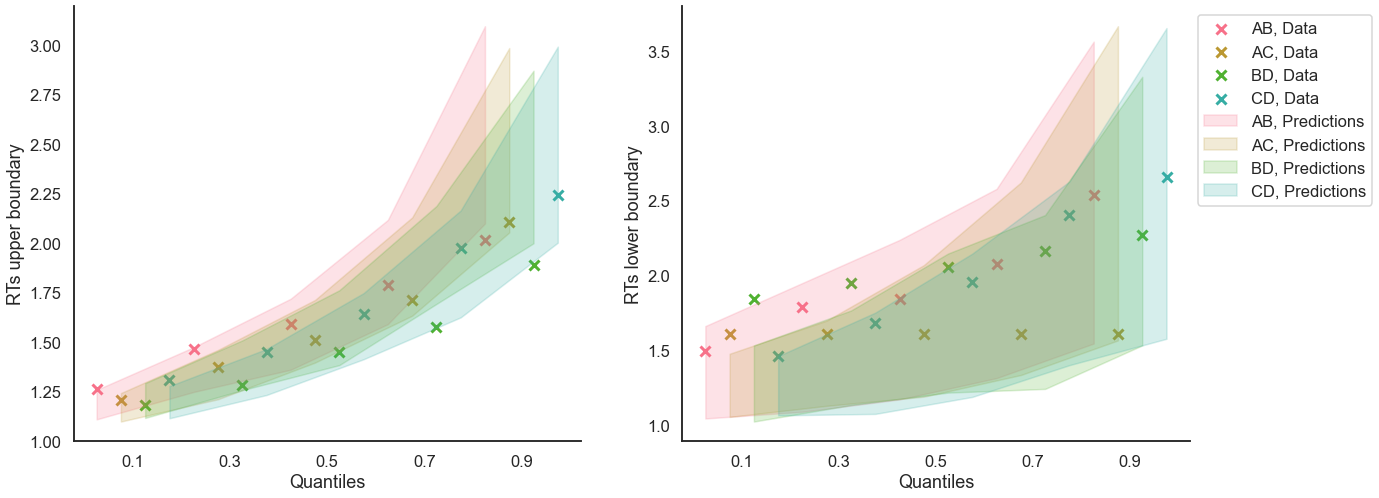

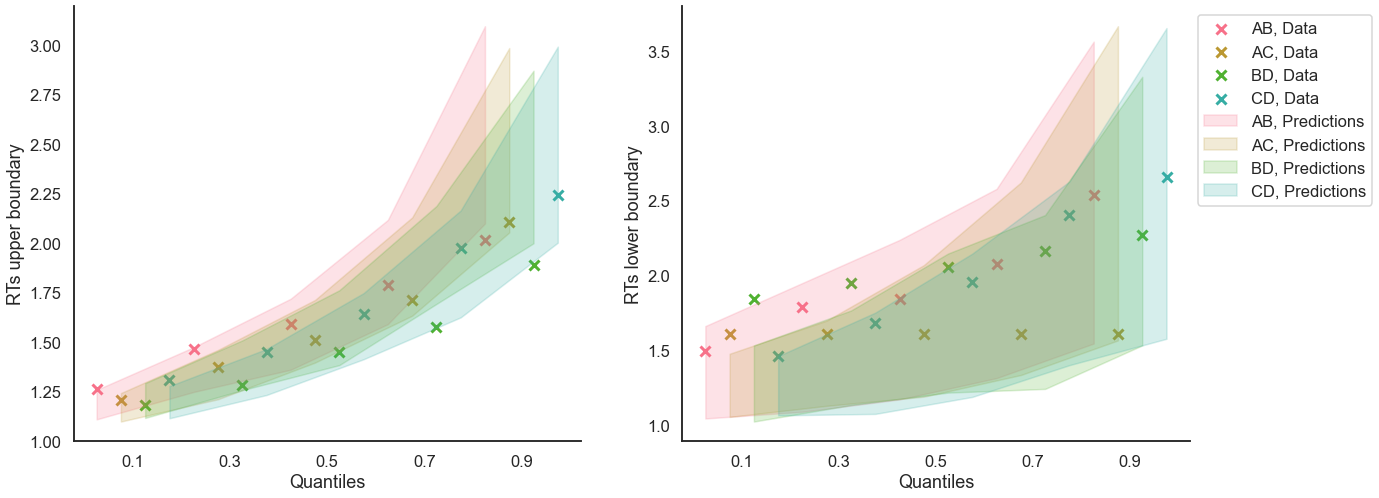

In [26]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9])